<a href="https://colab.research.google.com/github/schaeffer-thom/ML-projects/blob/main/IK_4dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("luisatencio/abb-irb-2400-arm-robot-kinematics-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/abb-irb-2400-arm-robot-kinematics-dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
data = pd.read_csv('/kaggle/input/abb-irb-2400-arm-robot-kinematics-dataset/datasetIRB2400.csv')

y = data[['q1_out','q2_out','q3_out','q4_out']]
x = data[['x','y','z','roll','pitch','yaw']]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       300000 non-null  float64
 1   y       300000 non-null  float64
 2   z       300000 non-null  float64
 3   yaw     300000 non-null  float64
 4   pitch   300000 non-null  float64
 5   roll    300000 non-null  float64
 6   q1_in   300000 non-null  float64
 7   q2_in   300000 non-null  float64
 8   q3_in   300000 non-null  float64
 9   q4_in   300000 non-null  float64
 10  q5_in   300000 non-null  float64
 11  q6_in   300000 non-null  float64
 12  q1_out  300000 non-null  float64
 13  q2_out  300000 non-null  float64
 14  q3_out  300000 non-null  float64
 15  q4_out  300000 non-null  float64
 16  q5_out  300000 non-null  float64
 17  q6_out  300000 non-null  float64
dtypes: float64(18)
memory usage: 41.2 MB
None


,x,y,z,yaw,pitch,roll,q1_in,q2_in,q3_in,q4_in,q5_in,q6_in,q1_out,q2_out,q3_out,q4_out,q5_out,q6_out
0,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2407,-0.7975,0.6551,-3.2989,1.1212,5.7052,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
1,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2233,-0.8511,0.5966,-3.2320,1.1662,5.6429,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
2,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2567,-0.9468,0.5820,-3.3165,1.1220,5.5944,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
3,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.1557,-0.8205,0.5532,-3.1993,1.2697,5.7474,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
4,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.3267,-0.9279,0.6722,-3.2867,1.2266,5.6304,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


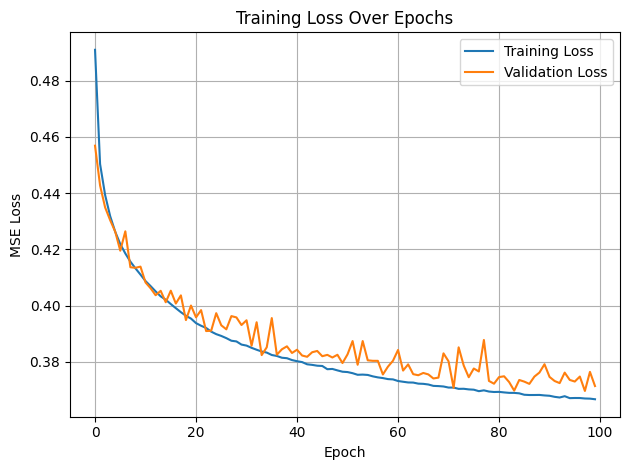

In [ ]:
# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train)
X_test = scaler_X.transform(x_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4)  # 4 joint angles output
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()